# LangChain : Chains
## Outline

* LLMChain
* Sequential Chains
  * SimpleSequentialChain
  * SequentialChain
* Router Chain

# Initial Setup

In [5]:
# API Key setup
import os

api = !cat ../`ls -a ../ | grep "gemini"`

api = api[0]

os.environ['GOOGLE_API_KEY'] = api
# universal variable, used by langchain

## Testing Prior knowledge

In [47]:
from langchain_google_genai import ChatGoogleGenerativeAI

chat = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.0)

In [55]:
long_text = """No matter how you best understand information, our products and tools help you find answers to your health questions.

YouTube’s work to bring authoritative, health-related content to more people
At YouTube, we are working to provide people with more access to quality health information and help creators reach more audiences. Our AI-powered dubbing tool, Aloud, streamlines the video translation and dubbing process at no cost, helping bridge that gap for creators. The tool has allowed institutions, such as Mass General Brigham, to dub first-aid videos from English into Spanish, providing potentially life-saving information to more people. Now they are expanding their efforts to include videos related to chronic conditions, like COPD and cancer.

We are also working to break down language barriers to bring more helpful information to health professionals. Starting today, a new animation-style course on the Stanford Medicine Continuing Medical Education YouTube channel will be available in Spanish for free. The course, which helps health professionals recognize and address implicit bias in clinical practice to better advocate for patients from underrepresented and underserved communities, was translated and dubbed using Aloud and is bridging the language gap to ultimately reach more individuals with this crucial knowledge.

Deeper health insights with Fitbit
Fitbit synthesizes your personal health and fitness data so you can track it in the Fitbit app. Our team is now building personal AI features to bring even more tailored, personalized insights that you can explore based on your unique needs and preferences.

Fitbit Labs, introduced last year, will give Premium users early access to experimental AI features to test out and give feedback on. Building on Google’s AI expertise, Fitbit Labs can help you get a fuller understanding of your health data and connect the dots across that information. You will be able to ask questions in a natural way and create charts just for you to help you understand your own data better. For example, you could dig deeper into how many active zone minutes \(AZMs\) you get and the correlation with how restorative your sleep is.

Screenshot on a phone showing example fitness data
An example of Fitbit Labs features that will be available later this year to a limited number of Android users who are enrolled in the Fitbit Labs program in the Fitbit mobile app.

Fitbit and Google Research are working together with health and wellness experts, doctors and certified coaches to create a new model for health and wellness. This new Personal Health Large Language Model will power future AI features across our portfolio.

"""

template = """Your job is to summarize the text delimited by the triple backticks. \
summarize and give the response in bullet points, if possible. \
\
text: ```{text}```
"""



In [56]:
from langchain.prompts import ChatPromptTemplate

lc_template = ChatPromptTemplate.from_template(template)

In [57]:
input_prompt = lc_template.format_messages(text=long_text)

In [58]:
resp = chat(input_prompt)

In [60]:
print(resp.content)

**YouTube's Health-Related Content Initiatives:**

- AI-powered dubbing tool (Aloud) streamlines video translation and dubbing, making health information accessible in multiple languages.
- Expansion of dubbed videos to include chronic conditions like COPD and cancer.
- Free Spanish-language animation course on implicit bias in clinical practice, translated and dubbed using Aloud.

**Fitbit's Health Insights:**

- Fitbit synthesizes personal health and fitness data for tracking in the Fitbit app.
- Development of personal AI features for tailored insights based on individual needs and preferences.
- Fitbit Labs provides early access to experimental AI features for testing and feedback.
- Collaboration with health experts to create a Personal Health Large Language Model for future AI features.


In [72]:
# Memory

from langchain.memory import ConversationSummaryBufferMemory
from langchain.chains import ConversationChain

memory = ConversationSummaryBufferMemory(llm=chat, max_token_limit=100)

convo_chain = ConversationChain(memory=memory, llm=chat)

In [ ]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory.save_context({'input': "hello"}, {'output': "hi, what's up?"})
memory.save_context({'input': "What's on the schedule today?"}, {'output': f"{schedule}"})

In [74]:
memory.load_memory_variables({})

{'history': 'System: The human says hello to the AI and asks what is on the schedule for the day.\nAI: There is a meeting at 8am with your product team. You will need your powerpoint presentation prepared. 9am-12pm have time to work on your LangChain project which will go quickly because Langchain is such a powerful tool. At Noon, lunch at the italian resturant with a customer who is driving from over an hour away to meet you to understand the latest in AI. Be sure to bring your laptop to show the latest LLM demo.'}

In [77]:
convo_chain.predict(input="At what time is the meeting?")

'8am'

- Similarly, other memory buffers can be used too

# LLMChain

- Simple yet important
- Underpins a lot of chains
- Formats the prompt under the hood and then gives us the response


In [1]:
import pandas as pd
df = pd.read_csv('L3_data.csv')

In [2]:
df

,Product,Review
0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,Waterproof Phone Pouch,"I loved the waterproof sac, although the openi..."
2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,Milk Frother Handheld\n,I loved this product. But they only seem to l...
5,L'Or Espresso Café \n,Je trouve le goût médiocre. La mousse ne tient...
6,Hervidor de Agua Eléctrico,"Está lu bonita calienta muy rápido, es muy fun..."


In [20]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [6]:
llm = ChatGoogleGenerativeAI(temperature=0.9, model='gemini-pro')

In [8]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe \
    a company that makes {products}?"
)

In [9]:
chain = LLMChain(llm=llm, prompt=prompt)


In [16]:
product = "Queen Size Sheet Set"

output = chain.invoke([product]) # Chain.run() _deprecated_ or .invoke() and pass the input variables


In [17]:
print(type(output))

<class 'dict'>


In [18]:
print(output['text'])

* Luxurious Slumber
* Sleep Haven
* Royal Bedsheets
* Dream Weavers
* Serenity Sheets
* Celestial Comfort
* Snuggle Sanctuary
* Restful Retreat
* Haven of Dreams
* Tranquil Nights


# Sequential Chains
 
- The idea is to combine multiple chains where the output of the one chain is the input of the next chain

- There are 2 types of sequential chains
    - SimpleSequentialChain : single input/output
    - SequentialChain : Multiple inputs/outputs
    

## SimpleSequentialChain
- Single input and single output
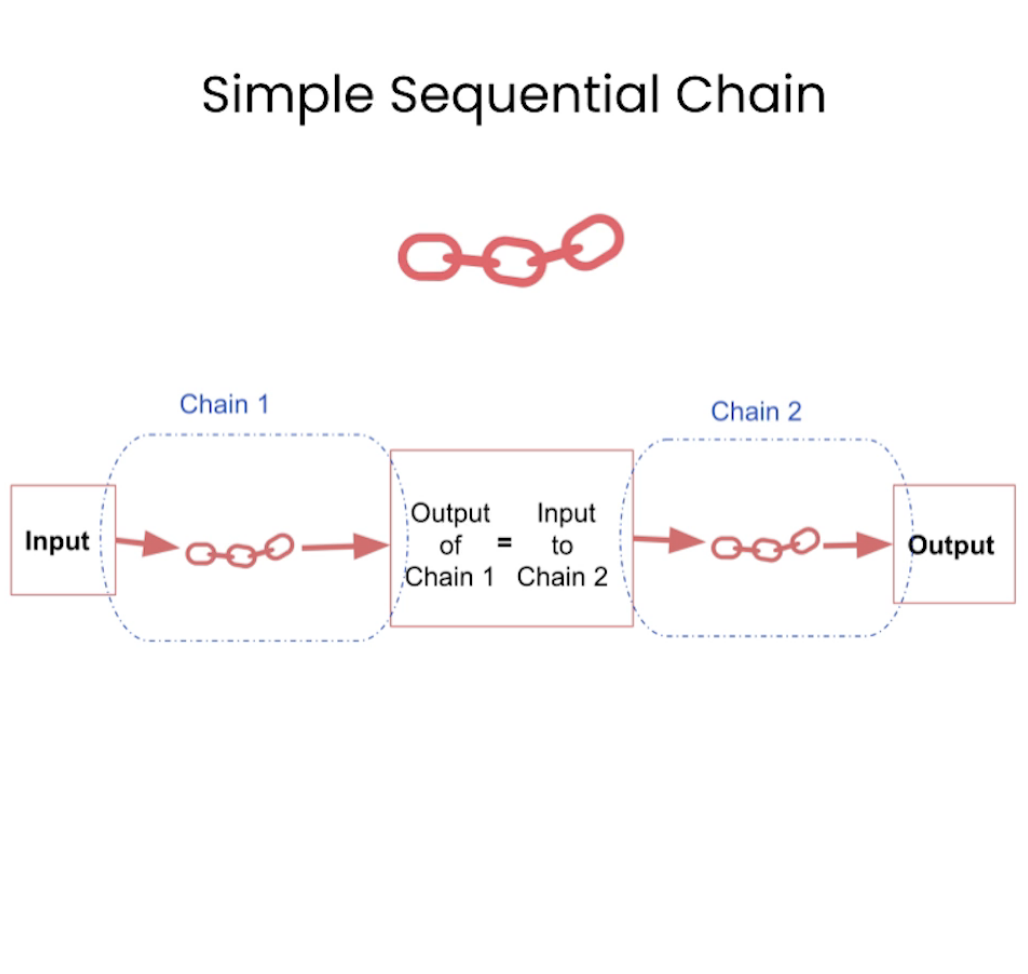

In [19]:
from langchain.chains import SimpleSequentialChain

In [22]:
# First template that goes as an input to the chain
first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe a company that makes {product}?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)


In [27]:
# Second prompt template
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following company: {company_name}\
    End the description with the company name in bold and uppercase letters"
)

# Chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)


In [28]:
overall_simple_chain = SimpleSequentialChain(
    chains=[chain_one, chain_two], # List of chains passed
    verbose=True # To see what's happening under the hood
)

In [29]:
product

'Queen Size Sheet Set'

In [30]:
overall_simple_chain.invoke(product)



> Entering new SimpleSequentialChain chain...
* Regal Sheets
* Majestic Linens
* Royal Comfort
* Queenly Slumber
* Grandiose Bedding
* Imperial Nights
* Sumptuous Sleep
* Elite Dreams
* Opulent Sheets
* Lavish Living
Experience the epitome of luxury and indulgence with our premium sheets, crafted to elevate your sleep to a regal level. **ROYAL COMFORT**

> Finished chain.


{'input': 'Queen Size Sheet Set',
 'output': 'Experience the epitome of luxury and indulgence with our premium sheets, crafted to elevate your sleep to a regal level. **ROYAL COMFORT**'}

In [31]:
overall_simple_chain.invoke(product)



> Entering new SimpleSequentialChain chain...
* Majestic Slumbers
* Royal Rest
* Imperial Comfort
* Regal Bedding
* Sovereign Sheets
* Paramount Linens
* Grandiose Sleep
* Imperial Sheets
* Regal Tex
* Royal Crown Bedding
Immerse yourself in the lap of luxury with our opulent bedding and linens collection, designed to elevate your sleep experience to royal heights. **MAJESTIC SLUMBERS**

> Finished chain.


{'input': 'Queen Size Sheet Set',
 'output': 'Immerse yourself in the lap of luxury with our opulent bedding and linens collection, designed to elevate your sleep experience to royal heights. **MAJESTIC SLUMBERS**'}

In [32]:
overall_simple_chain.invoke(product)



> Entering new SimpleSequentialChain chain...
* Royal Embrace
* Serene Slumbers
* Indulgent Comfort
* Tranquil Textiles
* Luxurious Linen
* Dreamy Nights
* Majestic Bedding
* Pillowtop Paradise
* Heavenly Haven
* Restful Retreat
Experience the ultimate in comfort and tranquility with **ROYAL EMBRACE**. Indulge in serene slumbers with our luxurious linen, dreamy textiles, and pillowtop paradise. Create a heavenly haven for restful nights and majestic bedding.

> Finished chain.


{'input': 'Queen Size Sheet Set',
 'output': 'Experience the ultimate in comfort and tranquility with **ROYAL EMBRACE**. Indulge in serene slumbers with our luxurious linen, dreamy textiles, and pillowtop paradise. Create a heavenly haven for restful nights and majestic bedding.'}

---
- **In Simple Sequential Chains, if the output of the first chain is a list, the second chain get's the first(mostly) item as the next input**

---

## SequentialChain
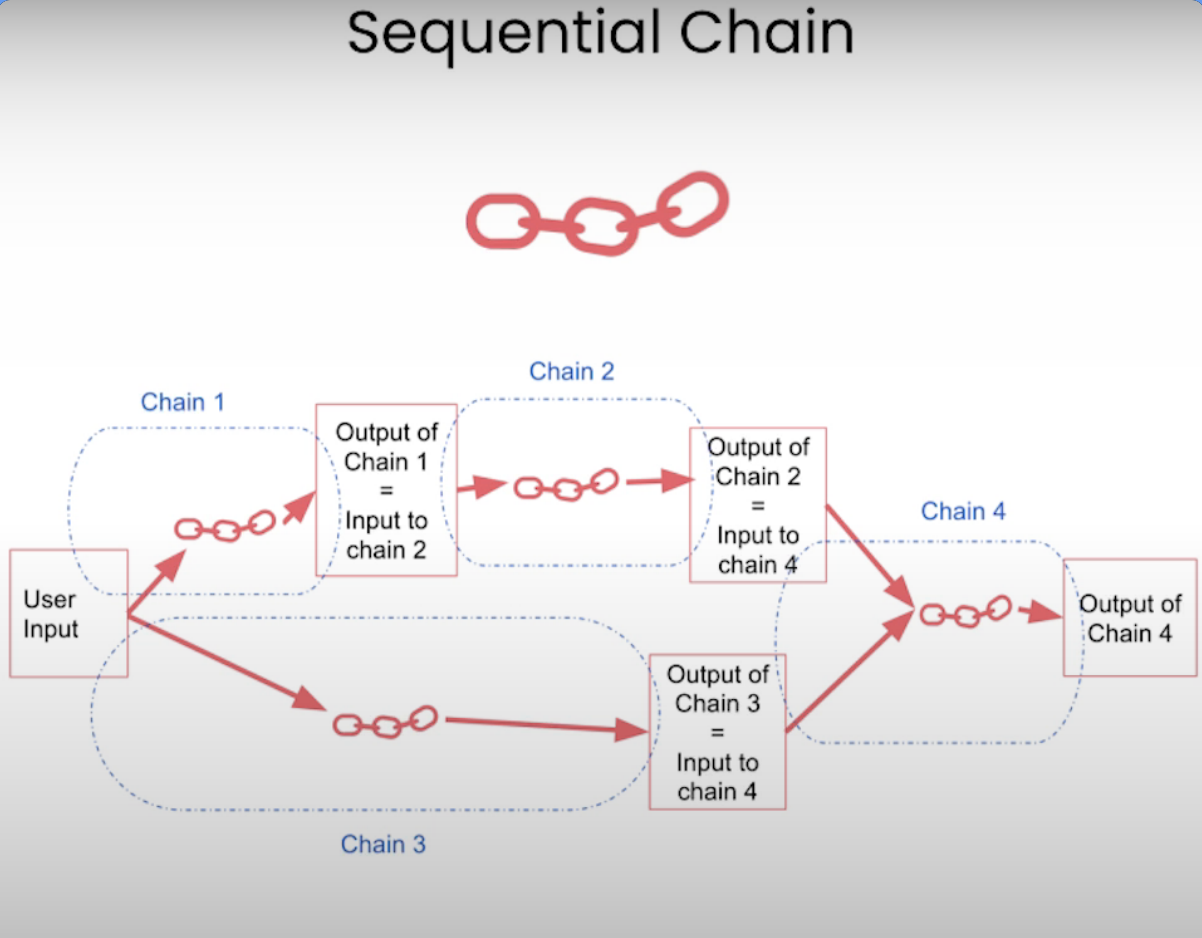

- This is similar to Wide and Deep NN model that was studied in TensorFlow

In [33]:
from langchain.chains import SequentialChain

In [52]:
from langchain.chat_models import ChatGooglePalm

# llm = ChatGooglePalm(temperature=0.9, model='Bison')

llm = ChatGoogleGenerativeAI(temperature=0.5, model='gemini-pro')

- Note how we need to specify the output key for each of the LLMChain

In [73]:
# First prompt and Chain : Translation
first_prompt = ChatPromptTemplate.from_template(
    "Please translate the following review to English:\
    \n\n{review}"
)

chain_one = LLMChain(llm = llm, 
                     prompt = first_prompt,
                     output_key = 'English_review')


# Second prompt and Chain : Summary
second_prompt = ChatPromptTemplate.from_template(
    "Cab you summarize the following review in 1 sentence:\
    \n\n {English_review}"
)

chain_two = LLMChain(llm = llm, 
                     prompt = second_prompt,
                     output_key = 'summary'
                    )


# Third prompt and Chain : Language identify
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review: \n\n{review}"
)

chain_three = LLMChain(llm = llm, 
                       prompt = third_prompt,
                       output_key = "language")


# Fourth prompt and chain : Follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following\
     summary in the specified language:\
    \n\nSummary: {summary}\
    \n\nLanguage: {language}"
)

chain_four = LLMChain(llm = llm, 
                      prompt = fourth_prompt,
                      output_key = 'followup_msg')




In [74]:
overall_chain = SequentialChain(
    chains = [chain_one, chain_two, chain_three, chain_four],
    input_variables = ['review'],
    output_variables = ['English_review', 'summary', 'language', 'followup_msg'],
    verbose = True
)

In [75]:
review = df.Review[6]
print(review)

Está lu bonita calienta muy rápido, es muy funcional, solo falta ver cuánto dura, solo llevo 3 días en funcionamiento.


In [76]:
overall_chain.invoke(review)



> Entering new SequentialChain chain...

> Finished chain.


{'review': 'Está lu bonita calienta muy rápido, es muy funcional, solo falta ver cuánto dura, solo llevo 3 días en funcionamiento.',
 'English_review': 'This beautiful stove heats up very quickly, it is very functional, we just need to see how long it lasts, I have only been using it for 3 days.',
 'summary': "The reviewer praises the stove's rapid heating and functionality, but expresses uncertainty about its durability due to its recent purchase.",
 'language': 'Spanish',
 'followup_msg': 'El crítico elogia el rápido calentamiento y la funcionalidad de la estufa, pero expresa incertidumbre sobre su durabilidad debido a su reciente compra.'}

## RouterChain
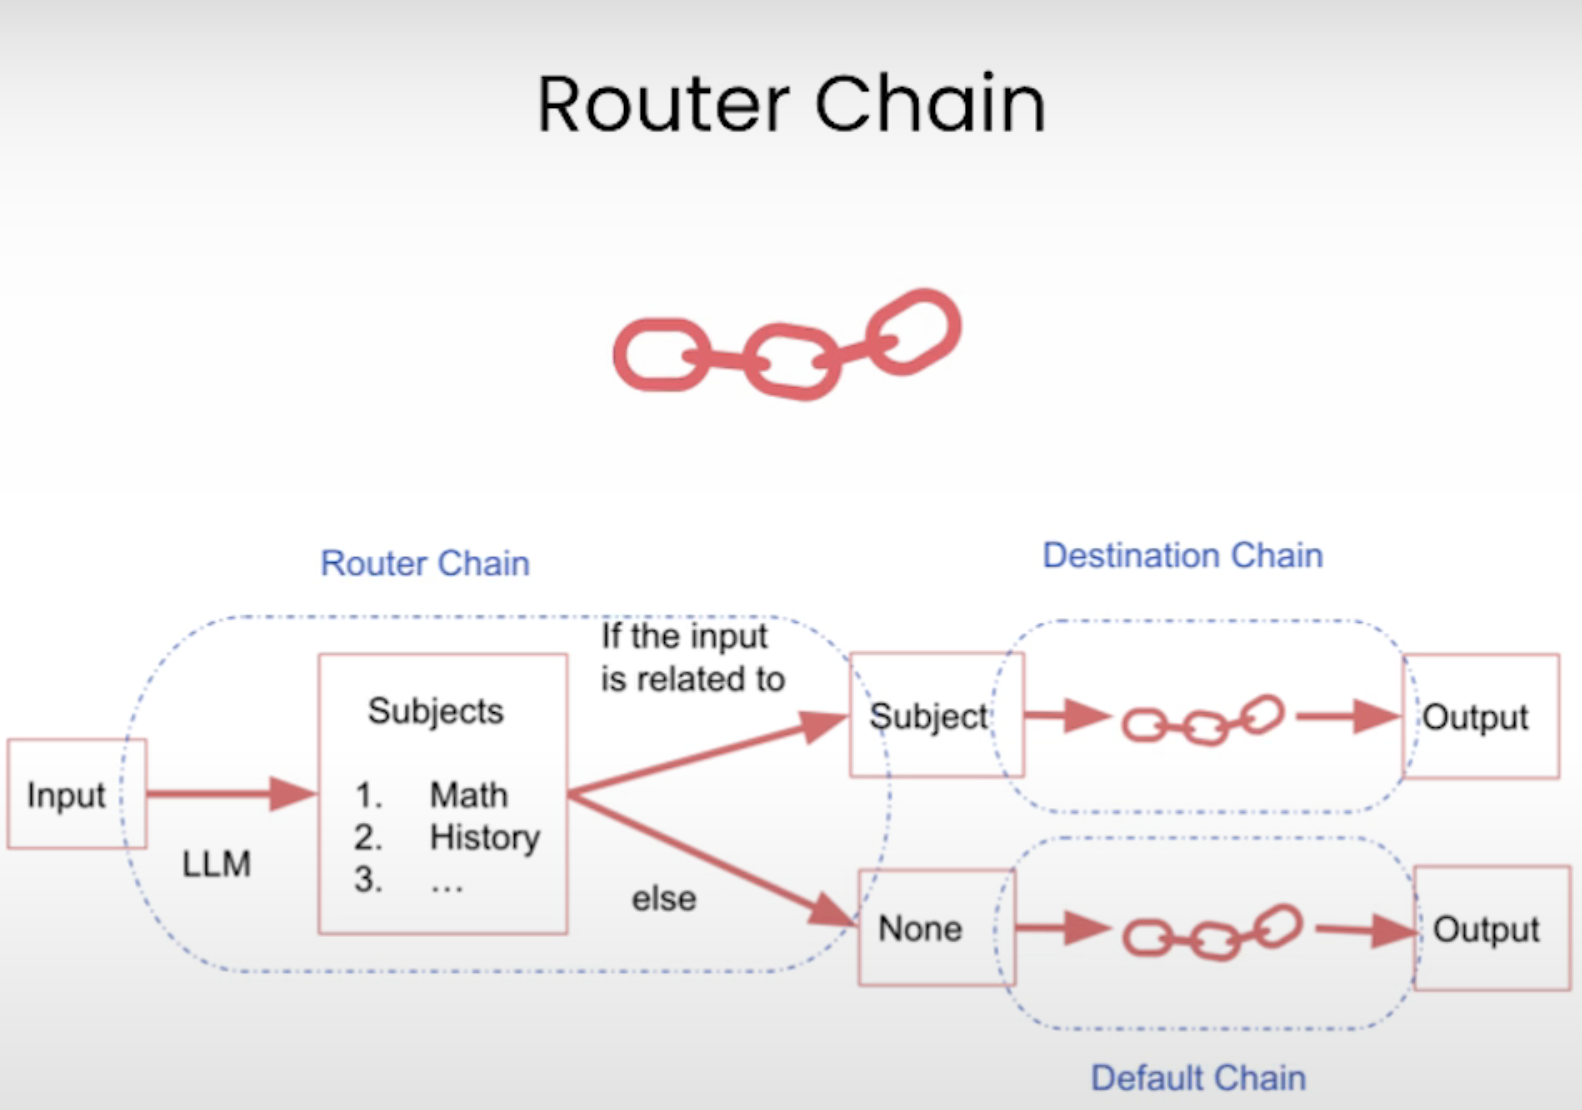
- For more complicated
- If-Else chains

In [77]:
# We are gonna specify a few templates, each for one subject

phyiscs_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts, 
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity. 

Here is a question:
{input}"""

In [78]:
# A list of dictionaries
# Each dict() contains 3 keys: name, description and prompt_template
prompt_info = [
    {
        "name": "Physics",
        "description": "Good for answering questions about physics",
        "prompt_template": phyiscs_template
    },
    {
        "name": "Maths",
        "description": "Good for answering maths questions",
        "prompt_template": math_template
    },
    {
        "name": "History",
        "description": "Good for answering hisotry questions",
        "prompt_template": history_template
    },
    {
        "name": "CS",
        "description": "Good for answering Computer science related questions",
        "prompt_template": computerscience_template
    },
]


In [164]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate


In [165]:
llm = ChatGoogleGenerativeAI(model="gemini-pro", 
                             temperature=0.7, 
                             safety_settings=None
                            )

In [167]:
destination_chains = {}
for each_prompt in prompt_info:
    name = each_prompt['name']
    prompt_template = each_prompt['prompt_template']
    
    prompt = ChatPromptTemplate.from_template(prompt_template)
    
    chain = LLMChain(llm=llm, prompt=prompt)
    
    destination_chains[name] = chain
                                  

In [168]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)


In [169]:
destinations = [f"{p['name']}: {p['description']}" for p in prompt_info]
destinations_str = "\n".join(destinations)

In [189]:
router_template = f"""Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts. DO NOT INCLUDE ANY CANDIDATE PROMPT NOT ALREADY PRESENET
\
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
destionations allowed, other than DEFAULT: {destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>""" 

In [8]:
from langchain.chains.llm_math.prompt import PROMPT

In [2]:
# Instead of manually typing the prompt, we could also use the following:
from langchain.chains.router.multi_prompt_prompt import MULTI_PROMPT_ROUTER_TEMPLATE

print(MULTI_PROMPT_ROUTER_TEMPLATE)

Given a raw text input to a language model select the model prompt best suited for the input. You will be given the names of the available prompts and a description of what the prompt is best suited for. You may also revise the original input if you think that revising it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt names specified below OR it can be "DEFAULT" if the input is not well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (must include ```json at the start of the respon

In [190]:
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser()
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [191]:
chain = MultiPromptChain(router_chain=router_chain, 
                         destination_chains=destination_chains,
                         default_chain=default_chain, verbose=True
                        )

---
- Now, we first pass the router_chain
    - This chain has the router_prompt
    - Which directs the LLM to choose the next chain based on the input
    - This router_prompt has a list of destination chains
    - Output is parsed into JSON
- The output gives us a dictionary with 2 keys
    - destination: what chain to choose next
    - next_input: what is the msg to be passed as an input to the next chain
- According to the output, the next chain is decided
- Then, the chain processes the input and gives us an output

---

In [196]:
router_chain.invoke("1+1+1+1")

{'input': '1+1+1+1',
 'destination': 'Maths',
 'next_inputs': {'input': '1+1+1+1'}}

In [197]:
chain.invoke("1+1+1+1")



> Entering new MultiPromptChain chain...
Maths: {'input': '1+1+1+1'}
> Finished chain.


{'input': '1+1+1+1', 'text': '1 + 1 + 1 + 1 = 4'}

In [186]:
chain.invoke("Who lead the Salt March in India before independence?")



> Entering new MultiPromptChain chain...
History: {'input': 'Who lead the Salt March in India before independence?'}
> Finished chain.


{'input': 'Who lead the Salt March in India before independence?',
 'text': 'Mahatma Gandhi'}

In [187]:
chain.invoke("write a python code to print hello world")



> Entering new MultiPromptChain chain...
CS: {'input': 'write a python code to print hello world'}
> Finished chain.


{'input': 'write a python code to print hello world',
 'text': '```python\nprint("Hello World")\n```'}

In [200]:
chain.invoke("what is the powerhouse of the cell?")



> Entering new MultiPromptChain chain...
None: {'input': 'what is the powerhouse of the cell?'}
> Finished chain.


{'input': 'what is the powerhouse of the cell?', 'text': 'Mitochondria'}

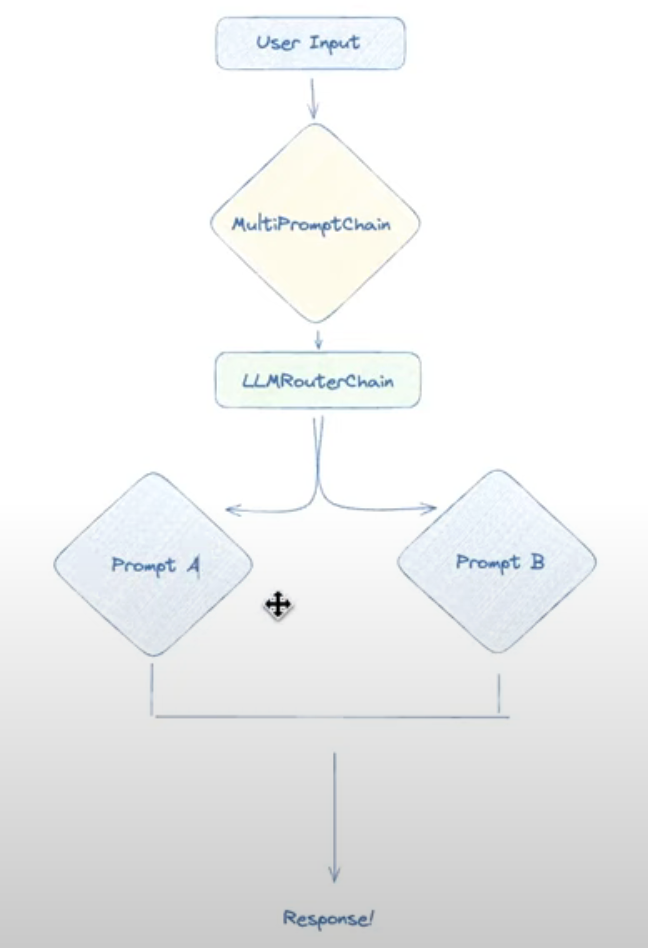